In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('advertising.csv')
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [2]:
print(df.head())
print(df.tail())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


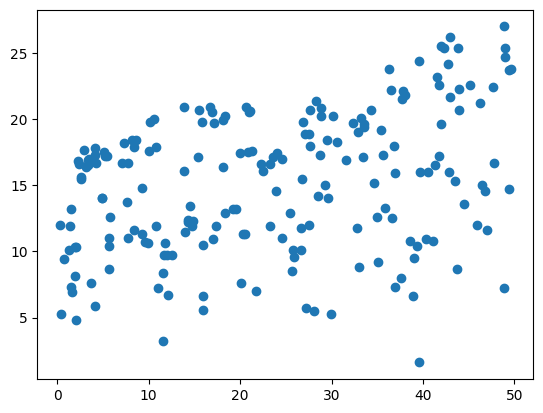

In [13]:
print((df["Radio"] == 0).sum())
df["Radio"] = df["Radio"].replace(0, np.NaN).fillna(df.median())
df = df.fillna(df.median())
print(df.isnull().sum())
plt.scatter(df["Radio"], df["Sales"])

In [19]:
X = df[["Newspaper"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

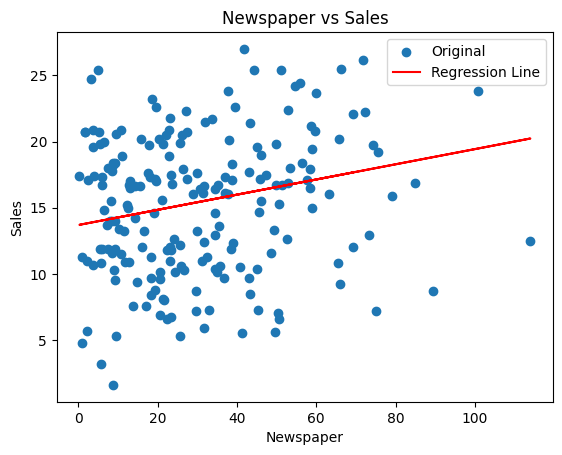

In [21]:
plt.scatter(df["Newspaper"], df["Sales"], label="Original")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")
plt.legend()
plt.show()

In [22]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

print(np.sum(np.square(y_test-y_pred)))

4.305584781945207
25.029660801104992
-0.13358971019497257
1251.4830400552496


In [23]:
new_input = float(input("Enter Newspaper: "))
new_input = np.array(new_input).reshape(-1, 1)
y_new = model.predict(new_input)
print(y_new[0])

Enter Newspaper: 66.5
17.502926172286465


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
